In [20]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [21]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [22]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [23]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [24]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [25]:
batch_size = 32
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [26]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [27]:
import os

model_name = 'alexnet'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.alexnet(num_classes=10).to(device)

In [28]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-2)

Epoch 1: 100%|██████████| 157/157 [00:11<00:00, 13.56it/s, loss=1.16]


epoch: 1 done, loss: 0.06496355682611465
Acc: 0.2174
[0.01]


Epoch 2: 100%|██████████| 157/157 [00:11<00:00, 13.70it/s, loss=0.696]


epoch: 2 done, loss: 0.040637217462062836
Acc: 0.3284
[0.01]


Epoch 3: 100%|██████████| 157/157 [00:11<00:00, 14.07it/s, loss=0.751]


epoch: 3 done, loss: 0.029738012701272964
Acc: 0.3557
[0.01]


Epoch 4: 100%|██████████| 157/157 [00:10<00:00, 14.40it/s, loss=0.402]


epoch: 4 done, loss: 0.024244897067546844
Acc: 0.398
[0.01]


Epoch 5: 100%|██████████| 157/157 [00:10<00:00, 14.32it/s, loss=0.899]


epoch: 5 done, loss: 0.01958017237484455
Acc: 0.4434
[0.01]


Epoch 6: 100%|██████████| 157/157 [00:11<00:00, 14.27it/s, loss=0.485]


epoch: 6 done, loss: 0.01624974049627781
Acc: 0.4634
[0.01]


Epoch 7: 100%|██████████| 157/157 [00:10<00:00, 14.51it/s, loss=0.254] 


epoch: 7 done, loss: 0.012982001528143883
Acc: 0.4863
[0.01]


Epoch 8: 100%|██████████| 157/157 [00:11<00:00, 14.09it/s, loss=0.0668]


epoch: 8 done, loss: 0.01059136912226677
Acc: 0.4922
[0.01]


Epoch 9: 100%|██████████| 157/157 [00:11<00:00, 13.86it/s, loss=0.169] 


epoch: 9 done, loss: 0.009680114686489105
Acc: 0.4619
[0.01]


Epoch 10: 100%|██████████| 157/157 [00:11<00:00, 14.05it/s, loss=0.778] 


epoch: 10 done, loss: 0.008909733034670353
Acc: 0.5375
[0.01]


Epoch 11: 100%|██████████| 157/157 [00:10<00:00, 14.42it/s, loss=0.201] 


epoch: 11 done, loss: 0.008451410569250584
Acc: 0.4879
[0.01]


Epoch 12: 100%|██████████| 157/157 [00:10<00:00, 14.61it/s, loss=0.00337]


epoch: 12 done, loss: 0.006537383887916803
Acc: 0.4929
[0.01]


Epoch 13: 100%|██████████| 157/157 [00:10<00:00, 14.71it/s, loss=0.0589]


epoch: 13 done, loss: 0.0067596458829939365
Acc: 0.475
[0.01]


Epoch 14: 100%|██████████| 157/157 [00:11<00:00, 14.23it/s, loss=0.2]   


epoch: 14 done, loss: 0.006968917790800333
Acc: 0.5161
[0.01]


Epoch 15: 100%|██████████| 157/157 [00:10<00:00, 14.39it/s, loss=0.383] 


epoch: 15 done, loss: 0.0054398286156356335
Acc: 0.505
[0.01]


Epoch 16: 100%|██████████| 157/157 [00:10<00:00, 14.37it/s, loss=0.0603]


epoch: 16 done, loss: 0.005577506497502327
Acc: 0.5232
[0.01]


Epoch 17: 100%|██████████| 157/157 [00:11<00:00, 14.23it/s, loss=0.141]  


epoch: 17 done, loss: 0.004123305901885033
Acc: 0.5265
[0.01]


Epoch 18: 100%|██████████| 157/157 [00:10<00:00, 14.52it/s, loss=0.019]  


epoch: 18 done, loss: 0.004501886200159788
Acc: 0.5233
[0.01]


Epoch 19: 100%|██████████| 157/157 [00:10<00:00, 14.48it/s, loss=0.148] 


epoch: 19 done, loss: 0.004887516610324383
Acc: 0.5215
[0.01]


Epoch 20: 100%|██████████| 157/157 [00:10<00:00, 14.71it/s, loss=0.259] 


epoch: 20 done, loss: 0.004424726590514183
Acc: 0.5449
[0.01]


Epoch 21: 100%|██████████| 157/157 [00:10<00:00, 14.28it/s, loss=0.00558]


epoch: 21 done, loss: 0.0032658239360898733
Acc: 0.5569
[0.01]


Epoch 22: 100%|██████████| 157/157 [00:10<00:00, 14.41it/s, loss=0.00264]


epoch: 22 done, loss: 0.0035565749276429415
Acc: 0.5224
[0.01]


Epoch 23: 100%|██████████| 157/157 [00:11<00:00, 14.20it/s, loss=0.000674]


epoch: 23 done, loss: 0.0024544994812458754
Acc: 0.5449
[0.01]


Epoch 24: 100%|██████████| 157/157 [00:10<00:00, 14.28it/s, loss=0.118]   


epoch: 24 done, loss: 0.002913026139140129
Acc: 0.5384
[0.01]


Epoch 25: 100%|██████████| 157/157 [00:10<00:00, 14.40it/s, loss=0.000248]


epoch: 25 done, loss: 0.0034675737842917442
Acc: 0.5618
[0.01]


Epoch 26: 100%|██████████| 157/157 [00:10<00:00, 14.67it/s, loss=0.0595] 


epoch: 26 done, loss: 0.003396112471818924
Acc: 0.502
[0.01]


Epoch 27: 100%|██████████| 157/157 [00:10<00:00, 14.46it/s, loss=2.83e-7]


epoch: 27 done, loss: 0.0031301232520490885
Acc: 0.5585
[0.001]


Epoch 28: 100%|██████████| 157/157 [00:10<00:00, 14.54it/s, loss=0.0584]  


epoch: 28 done, loss: 0.0007612394401803613
Acc: 0.5762
[0.001]


Epoch 29: 100%|██████████| 157/157 [00:10<00:00, 14.52it/s, loss=0.0437]  


epoch: 29 done, loss: 0.0003908048674929887
Acc: 0.5779
[0.001]


Epoch 30: 100%|██████████| 157/157 [00:10<00:00, 14.33it/s, loss=2.28e-5] 


epoch: 30 done, loss: 0.00021321064559742808
Acc: 0.5799
[0.001]


Epoch 31: 100%|██████████| 157/157 [00:11<00:00, 14.08it/s, loss=0.00602] 


epoch: 31 done, loss: 0.00020775131997652352
Acc: 0.5818
[0.001]


Epoch 32: 100%|██████████| 157/157 [00:11<00:00, 14.20it/s, loss=7.63e-6] 


epoch: 32 done, loss: 0.000130912521854043
Acc: 0.5831
[0.001]


Epoch 33: 100%|██████████| 157/157 [00:10<00:00, 14.47it/s, loss=4.02e-5] 


epoch: 33 done, loss: 0.0001219978803419508
Acc: 0.582
[0.001]


Epoch 34: 100%|██████████| 157/157 [00:11<00:00, 14.18it/s, loss=0.0134]  


epoch: 34 done, loss: 0.00012848342885263264
Acc: 0.5838
[0.001]


Epoch 35: 100%|██████████| 157/157 [00:10<00:00, 14.38it/s, loss=7.45e-8] 


epoch: 35 done, loss: 0.00012047292693750933
Acc: 0.5825
[0.001]


Epoch 36: 100%|██████████| 157/157 [00:10<00:00, 14.58it/s, loss=0.000205]


epoch: 36 done, loss: 6.895769911352545e-05
Acc: 0.5836
[0.001]


Epoch 37: 100%|██████████| 157/157 [00:10<00:00, 14.46it/s, loss=9e-6]    


epoch: 37 done, loss: 7.248117617564276e-05
Acc: 0.5828
[0.001]


Epoch 38: 100%|██████████| 157/157 [00:10<00:00, 14.47it/s, loss=1.36e-6] 


epoch: 38 done, loss: 6.258815119508654e-05
Acc: 0.5833
[0.001]


Epoch 39: 100%|██████████| 157/157 [00:11<00:00, 14.20it/s, loss=6.62e-6] 


epoch: 39 done, loss: 4.054437522427179e-05
Acc: 0.585
[0.001]


Epoch 40: 100%|██████████| 157/157 [00:11<00:00, 14.26it/s, loss=0.000113]


epoch: 40 done, loss: 4.770455416291952e-05
Acc: 0.5851
[0.001]


Epoch 41: 100%|██████████| 157/157 [00:10<00:00, 14.33it/s, loss=0.000194]


epoch: 41 done, loss: 3.580018528737128e-05
Acc: 0.5863
[0.001]


Epoch 42: 100%|██████████| 157/157 [00:10<00:00, 14.51it/s, loss=2.15e-6] 


epoch: 42 done, loss: 4.9005848268279806e-05
Acc: 0.5854
[0.001]


Epoch 43: 100%|██████████| 157/157 [00:10<00:00, 14.75it/s, loss=7.39e-6] 


epoch: 43 done, loss: 3.907206701114774e-05
Acc: 0.5863
[0.001]


Epoch 44: 100%|██████████| 157/157 [00:10<00:00, 14.41it/s, loss=0.00071] 


epoch: 44 done, loss: 2.9185479434090666e-05
Acc: 0.5855
[0.001]


Epoch 45: 100%|██████████| 157/157 [00:10<00:00, 14.46it/s, loss=3.13e-7] 


epoch: 45 done, loss: 3.2826548704179004e-05
Acc: 0.5854
[0.001]


Epoch 46: 100%|██████████| 157/157 [00:11<00:00, 14.23it/s, loss=0.00813] 


epoch: 46 done, loss: 3.281718454672955e-05
Acc: 0.587
[0.001]


Epoch 47: 100%|██████████| 157/157 [00:10<00:00, 14.55it/s, loss=8.63e-5] 


epoch: 47 done, loss: 3.074690903304145e-05
Acc: 0.5867
[0.001]


Epoch 48: 100%|██████████| 157/157 [00:10<00:00, 14.91it/s, loss=8.97e-6] 


epoch: 48 done, loss: 2.8950245905434713e-05
Acc: 0.587
[0.001]


Epoch 49: 100%|██████████| 157/157 [00:10<00:00, 14.77it/s, loss=1.94e-6] 


epoch: 49 done, loss: 2.3523703930550255e-05
Acc: 0.5875
[0.001]


Epoch 50: 100%|██████████| 157/157 [00:10<00:00, 14.81it/s, loss=5.36e-6] 


epoch: 50 done, loss: 2.341752224310767e-05
Acc: 0.5884
[0.001]


Epoch 51: 100%|██████████| 157/157 [00:11<00:00, 13.98it/s, loss=2.37e-6] 


epoch: 51 done, loss: 2.1022173314122483e-05
Acc: 0.588
[0.001]


Epoch 52: 100%|██████████| 157/157 [00:10<00:00, 14.48it/s, loss=6.81e-6] 


epoch: 52 done, loss: 1.5093004549271427e-05
Acc: 0.5884
[0.001]


Epoch 53: 100%|██████████| 157/157 [00:10<00:00, 14.46it/s, loss=2.68e-7] 


epoch: 53 done, loss: 1.336529658146901e-05
Acc: 0.5886
[0.001]


Epoch 54: 100%|██████████| 157/157 [00:10<00:00, 14.35it/s, loss=1.56e-5] 


epoch: 54 done, loss: 2.2305168386083096e-05
Acc: 0.587
[0.001]


Epoch 55: 100%|██████████| 157/157 [00:10<00:00, 14.49it/s, loss=0.000305]


epoch: 55 done, loss: 2.004051930271089e-05
Acc: 0.588
[0.001]


Epoch 56: 100%|██████████| 157/157 [00:10<00:00, 14.39it/s, loss=1.49e-8] 


epoch: 56 done, loss: 2.7452435460872948e-05
Acc: 0.5872
[0.001]


Epoch 57: 100%|██████████| 157/157 [00:10<00:00, 14.41it/s, loss=0.000373]


epoch: 57 done, loss: 2.2974285457166843e-05
Acc: 0.5877
[0.0001]


Epoch 58: 100%|██████████| 157/157 [00:10<00:00, 14.34it/s, loss=0]       


epoch: 58 done, loss: 1.1698492016876116e-05
Acc: 0.5878
[0.0001]


Epoch 59: 100%|██████████| 157/157 [00:10<00:00, 14.42it/s, loss=2.77e-6] 


epoch: 59 done, loss: 1.3469543773680925e-05
Acc: 0.588
[0.0001]


Epoch 60: 100%|██████████| 157/157 [00:10<00:00, 14.87it/s, loss=2.53e-7] 


epoch: 60 done, loss: 1.9889721443178132e-05
Acc: 0.5878
[0.0001]


Epoch 61: 100%|██████████| 157/157 [00:10<00:00, 14.40it/s, loss=9.3e-5]  


epoch: 61 done, loss: 1.3806141396344174e-05
Acc: 0.5876
[0.0001]


Epoch 62: 100%|██████████| 157/157 [00:10<00:00, 14.36it/s, loss=5.51e-7] 


epoch: 62 done, loss: 2.0105475414311513e-05
Acc: 0.5877
[1e-05]


Epoch 63: 100%|██████████| 157/157 [00:10<00:00, 14.49it/s, loss=0.000749]


epoch: 63 done, loss: 2.1621830455842428e-05
Acc: 0.588
[1e-05]


Epoch 64: 100%|██████████| 157/157 [00:10<00:00, 14.59it/s, loss=1.94e-7] 


epoch: 64 done, loss: 1.3612489055958577e-05
Acc: 0.588
[1e-05]


Epoch 65: 100%|██████████| 157/157 [00:10<00:00, 14.97it/s, loss=1.85e-5] 


epoch: 65 done, loss: 1.569782216392923e-05
Acc: 0.588
[1e-05]


Epoch 66: 100%|██████████| 157/157 [00:10<00:00, 14.98it/s, loss=8.94e-8] 


epoch: 66 done, loss: 1.0255502274958417e-05
Acc: 0.588
[1e-05]


Epoch 67: 100%|██████████| 157/157 [00:10<00:00, 14.66it/s, loss=1.08e-5] 


epoch: 67 done, loss: 1.3762331946054474e-05
Acc: 0.588
[1e-05]


Epoch 68: 100%|██████████| 157/157 [00:10<00:00, 14.86it/s, loss=9.62e-5] 


epoch: 68 done, loss: 1.2961326319782529e-05
Acc: 0.5881
[1e-05]


Epoch 69: 100%|██████████| 157/157 [00:10<00:00, 14.78it/s, loss=8.05e-7] 


epoch: 69 done, loss: 1.5124186575121712e-05
Acc: 0.588
[1e-05]


Epoch 70: 100%|██████████| 157/157 [00:10<00:00, 15.09it/s, loss=0]       


epoch: 70 done, loss: 1.8259526768815704e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 157/157 [00:10<00:00, 14.89it/s, loss=1.34e-7] 


epoch: 71 done, loss: 1.850268745329231e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 157/157 [00:10<00:00, 14.89it/s, loss=1.25e-5] 


epoch: 72 done, loss: 1.192687159345951e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 157/157 [00:10<00:00, 15.12it/s, loss=5.96e-8] 


epoch: 73 done, loss: 1.9121120203635655e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 157/157 [00:10<00:00, 14.80it/s, loss=0.00856] 


epoch: 74 done, loss: 1.8835151422536e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 157/157 [00:10<00:00, 14.82it/s, loss=1.68e-5] 


epoch: 75 done, loss: 1.7352089344058186e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 157/157 [00:10<00:00, 14.88it/s, loss=3.41e-6] 


epoch: 76 done, loss: 1.5430592611664906e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 157/157 [00:10<00:00, 15.24it/s, loss=1.33e-5] 


epoch: 77 done, loss: 1.7047746950993314e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 157/157 [00:10<00:00, 15.10it/s, loss=0.00224] 


epoch: 78 done, loss: 1.545787563372869e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 157/157 [00:09<00:00, 15.71it/s, loss=2.53e-6] 


epoch: 79 done, loss: 1.747544592944905e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 157/157 [00:09<00:00, 16.35it/s, loss=1.49e-8] 


epoch: 80 done, loss: 1.0893188118643593e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 157/157 [00:09<00:00, 16.40it/s, loss=4.44e-5] 


epoch: 81 done, loss: 1.7567124814377166e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 157/157 [00:09<00:00, 16.44it/s, loss=0]       


epoch: 82 done, loss: 1.1686272955557797e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 157/157 [00:09<00:00, 16.11it/s, loss=0]       


epoch: 83 done, loss: 1.4584962627850473e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 157/157 [00:09<00:00, 15.99it/s, loss=6.99e-6] 


epoch: 84 done, loss: 1.50597998072044e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 157/157 [00:09<00:00, 16.44it/s, loss=7e-7]    


epoch: 85 done, loss: 1.943834467965644e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 157/157 [00:09<00:00, 16.36it/s, loss=1.39e-5] 


epoch: 86 done, loss: 1.2262106793059502e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 157/157 [00:10<00:00, 15.31it/s, loss=0.000254]


epoch: 87 done, loss: 1.4885674318065867e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 157/157 [00:10<00:00, 15.14it/s, loss=4.28e-5] 


epoch: 88 done, loss: 1.4658588952443097e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 157/157 [00:09<00:00, 15.95it/s, loss=0.000361]


epoch: 89 done, loss: 1.560757664265111e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 157/157 [00:09<00:00, 15.84it/s, loss=5.96e-8] 


epoch: 90 done, loss: 1.5648865883122198e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 157/157 [00:09<00:00, 16.47it/s, loss=3.13e-7] 


epoch: 91 done, loss: 2.536407373554539e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 157/157 [00:08<00:00, 17.58it/s, loss=0.0115]  


epoch: 92 done, loss: 1.5358264136011712e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 157/157 [00:08<00:00, 17.66it/s, loss=0]       


epoch: 93 done, loss: 1.4639667824667413e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 157/157 [00:08<00:00, 17.87it/s, loss=0]       


epoch: 94 done, loss: 8.948906724981498e-06
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 157/157 [00:08<00:00, 17.47it/s, loss=8.94e-7] 


epoch: 95 done, loss: 2.8932883651577868e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 157/157 [00:08<00:00, 17.52it/s, loss=9.83e-7] 


epoch: 96 done, loss: 2.193302134401165e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 157/157 [00:08<00:00, 18.09it/s, loss=0.00252] 


epoch: 97 done, loss: 1.1390317922632676e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 157/157 [00:09<00:00, 17.32it/s, loss=1.05e-5] 


epoch: 98 done, loss: 1.197867368318839e-05
Acc: 0.588
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 157/157 [00:08<00:00, 17.66it/s, loss=6.18e-5] 


epoch: 99 done, loss: 1.6457161109428853e-05
Acc: 0.5881
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 157/157 [00:08<00:00, 17.62it/s, loss=2.98e-8] 


epoch: 100 done, loss: 1.8867214748752303e-05
Acc: 0.5881
[1.0000000000000002e-06]
Time taken: 2286.44502 seconds


In [29]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.5886, tensor(0.0911, device='cuda:0'))

<AxesSubplot: >

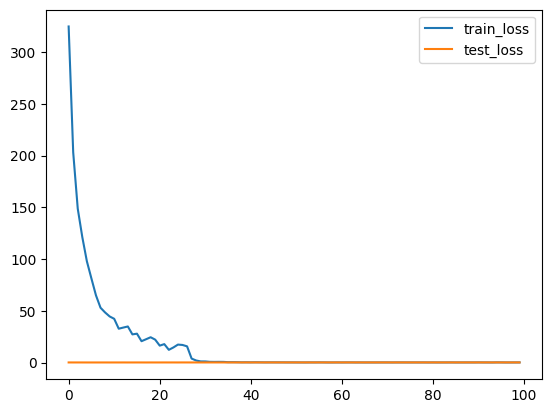

In [30]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])